In [640]:
from qiskit.quantum_info import Statevector
zero = Statevector.from_int(0, dims=2)
one = Statevector.from_int(1, dims=2)

In [641]:
psi = one^zero^zero
psi.draw("latex")

<IPython.core.display.Latex object>

In [642]:
psi = Statevector.from_int(4, dims=8)

In [643]:
from qiskit.quantum_info import Pauli
Z0Z1 = Pauli("ZZI")
print("Z0Z1 is",Z0Z1)
print("and its matrix is")
print(Z0Z1.to_matrix())

Z0Z1 is ZZI
and its matrix is
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j]]


In [644]:
from qiskit.opflow import I, Z
H_cut = (Z^Z^I) + (Z^I^Z)

# Z0Z1 because we have an edge between 0-1
# Z0Z2 because we have an edge between 0-2

Above is the Hamiltonian for the following simple graph:

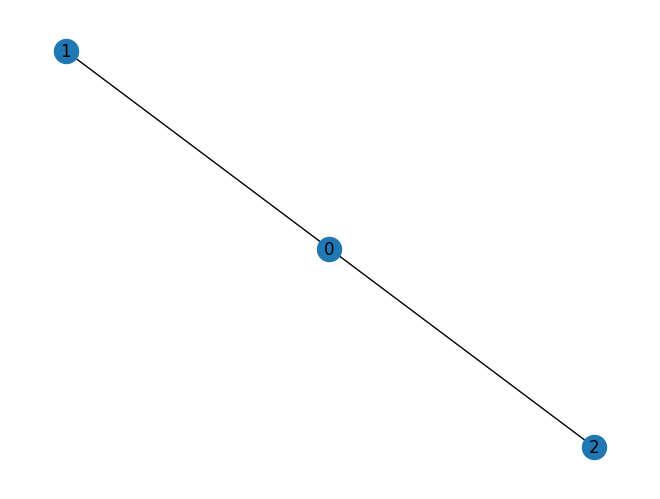

In [645]:
import numpy as np   
import networkx as nx  
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_edges_from([(0,1),(0,2)])
labelmap = dict(zip(G.nodes(), ["0", "1", "2"]))
nx.draw(G, labels=labelmap, with_labels=True) 
plt.show()

In [646]:
print(H_cut)

1.0 * ZZI
+ 1.0 * ZIZ


In [648]:

word = Pauli("ZZI")
word2 = Pauli("ZIZ")
H_cut = PauliOp(word) 
H_cut += PauliOp(word2)
H_cut

/tmp/ipykernel_409/2229202239.py:3: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.pauli_op.PauliOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  H_cut = PauliOp(word)
/tmp/ipykernel_409/2229202239.py:4: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.pauli_op.PauliOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  H_cut += PauliOp(word2)


PauliSumOp(SparsePauliOp(['ZZI', 'ZIZ'],
              coeffs=[1.+0.j, 1.+0.j]), coeff=1.0)

In [639]:
print(psi.expectation_value(H_cut))

(-2+0j)


In [37]:
for n in range(0, 8):
    psi=Statevector.from_int(n, dims=8)
    print(n, ":", psi.expectation_value(H_cut))

0 : (2+0j)
1 : 0j
2 : 0j
3 : (-2+0j)
4 : (-2+0j)
5 : 0j
6 : 0j
7 : (2+0j)


Maximally entangled m=3 m-reg graph would look like all permutations of Z_j from j=0,...,3

for say nodes k=4

looks like a tetragonal pyramid

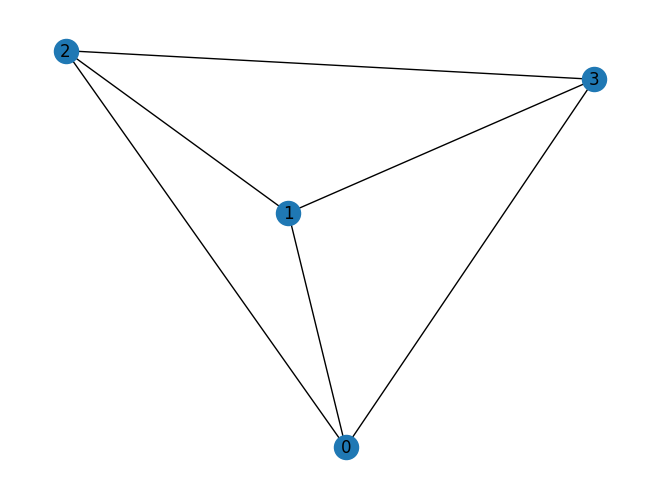

In [66]:
import numpy as np   
import networkx as nx  
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_edges_from([(0,1),(0,2),(0,3),(1,2),(1,3),(2,3)])
labelmap = dict(zip(G.nodes(), ["0", "1", "2", "3"]))
nx.draw(G, labels=labelmap, with_labels=True) 
plt.show()

In [50]:
from qiskit.opflow import I, Z
#H_cut = (Z^Z^I) + (Z^I^Z)

for i in range(0,4):
    for j in range(0,i+1):
        if i != j:
            print(j, i)

0 1
0 2
1 2
0 3
1 3
2 3


In [51]:
H_cut = (Z^Z^I^I) + (Z^I^Z^I) + (I^Z^Z^I) + (Z^I^I^Z) + (I^Z^I^Z) + (I^I^Z^Z)

In [673]:
print("Assignment : Value")
for n in range(0, 16):
    psi=Statevector.from_int(n, dims=16)
    print('{0:04b}'.format(n), ":", psi.expectation_value(H_cut))

Assignment : Value


QiskitError: 'Number of left qubits does not match matrix shape'

In [55]:
'{0:04b}'.format(15)

'1111'

Now let's try for recursive, 3-reg connected, Cayley-like graphs

In [716]:
n = 1 # Hausdorff dimension

ks = [1,4]
for i in range(0,n+5):
    ks.append(ks[-1] + 6*(2**(len(ks)-2)))
k=ks[n]
print(ks)
print(k)

[1, 4, 10, 22, 46, 94, 190, 382]
4


In [717]:
edges = [[0,1],[0,2],[0,3]]
vertices = [[0],[1,2,3]]

if n==1:
    edges.append([1,2])
    edges.append([2,3])
    edges.append([3,1])
    
for i in range(1,n):
    #print("n:", i)
    leaves = [l for l in range(ks[i], ks[i+1])]
    vertices.append(leaves)
    #print('leaves:')
    #print(vertices)
    
    # Correction for n=0 case
    if i==0:
        j=0
    else:
        j=i
    
    vert_chunks = list(zip(*[iter(vertices[j+1])] * 2))

    # Connect vertices to new leaves
    for vc in range(0,len(vert_chunks)):
        for v in vert_chunks[vc]:
            edges.append([vertices[i][vc],v])
    
    if i==n-1:
        # Connect leaves to each other *only for outer leaves*
        for l in range(leaves[0],leaves[-1]):
            #print([l,(l%leaves[-1])+1])
            edges.append([l,(l%leaves[-1])+1])
        #print([leaves[-1],leaves[0]])
        edges.append([leaves[-1],leaves[0]])
#edges

In [718]:
labels = [str(i) for i in range(0,k)]
#labels

In [719]:
print(k)

4


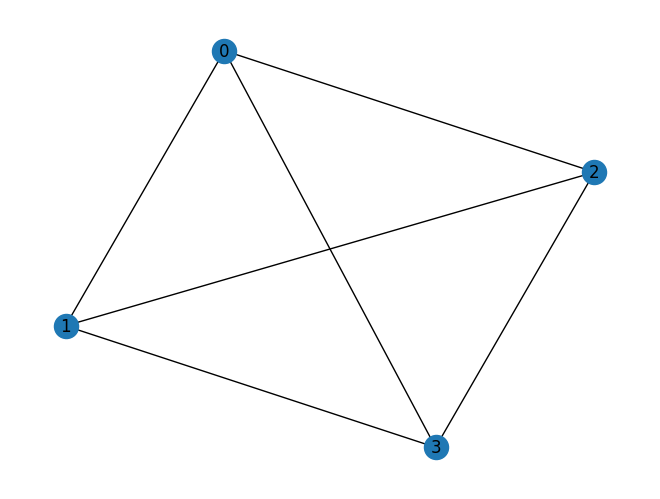

In [720]:
import numpy as np   
import networkx as nx  
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_edges_from(edges)
labelmap = dict(zip(G.nodes(), labels))
nx.draw(G, labels=labelmap, with_labels=True) 
plt.show()

In [721]:
for i in G.degree():
    if(i[1] != 3):
        print("Not a 3-reg graph.")
        break

Let's now make the Hamiltonian and find the MaxCut

In [722]:
word = Pauli("ZZI")
word2 = Pauli("ZII")
H_cut = PauliOp(word) 
H_cut += PauliOp(word2)
H_cut

/tmp/ipykernel_409/2953531878.py:3: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.pauli_op.PauliOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  H_cut = PauliOp(word)
/tmp/ipykernel_409/2953531878.py:4: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.pauli_op.PauliOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  H_cut += PauliOp(word2)


PauliSumOp(SparsePauliOp(['ZZI', 'ZII'],
              coeffs=[1.+0.j, 1.+0.j]), coeff=1.0)

In [723]:

init_str = ""
for c in range(0,k):
    if c in edges[0]:
        init_str += "Z"
    else:
        init_str += "I"
H_cut = PauliOp(Pauli(init_str))


for edge in edges[1:]:
    _str = ""
    for c in range(0,k):
        if c in edge:
            _str += "Z"
        else:
            _str += "I"
    print(_str)
    H_cut += PauliOp(Pauli(_str))
    print(edge)

ZIZI
[0, 2]
ZIIZ
[0, 3]
IZZI
[1, 2]
IIZZ
[2, 3]
IZIZ
[3, 1]


/tmp/ipykernel_409/3473452247.py:7: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.pauli_op.PauliOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  H_cut = PauliOp(Pauli(init_str))
/tmp/ipykernel_409/3473452247.py:18: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.pauli_op.PauliOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  H_cut += PauliOp(Pauli(_str))


In [724]:
H_cut

PauliSumOp(SparsePauliOp(['ZZII', 'ZIZI', 'ZIIZ', 'IZZI', 'IIZZ', 'IZIZ'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]), coeff=1.0)

In [725]:
print(2**k)

16


In [733]:
exp_vals = []
for n in range(0, 2**k):
    psi=Statevector.from_int(n, dims=2**k)
    exp_vals.append(('{0:04b}'.format(n), psi.expectation_value(H_cut)))
exp_vals

[('0000', (6+0j)),
 ('0001', 0j),
 ('0010', 0j),
 ('0011', (-2+0j)),
 ('0100', 0j),
 ('0101', (-2+0j)),
 ('0110', (-2+0j)),
 ('0111', 0j),
 ('1000', 0j),
 ('1001', (-2+0j)),
 ('1010', (-2+0j)),
 ('1011', 0j),
 ('1100', (-2+0j)),
 ('1101', 0j),
 ('1110', 0j),
 ('1111', (6+0j))]

In [734]:
res1 = min(list(zip(*exp_vals))[1])
res1

(-2+0j)

In [735]:
for ev in exp_vals:
    if ev[1] == res1:
        print(ev[0])

0011
0101
0110
1001
1010
1100
